In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [2]:
#import data files and covert to data frames
data_daily = pd.read_csv('https://raw.githubusercontent.com/HDSC-21/covid19-on-the-global-economy/main/Source/worldometer_coronavirus_daily_data.csv')
data = pd.read_csv('https://raw.githubusercontent.com/HDSC-21/covid19-on-the-global-economy/main/Source/worldometer_coronavirus_summary_data.csv')

In [3]:
#view data frame daily
data_daily.head()

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
0,2020-2-15,Afghanistan,0.0,NaN,0.0,0.0,NaN
1,2020-2-16,Afghanistan,0.0,NaN,0.0,0.0,NaN
2,2020-2-17,Afghanistan,0.0,NaN,0.0,0.0,NaN
3,2020-2-18,Afghanistan,0.0,NaN,0.0,0.0,NaN
4,2020-2-19,Afghanistan,0.0,NaN,0.0,0.0,NaN


In [4]:
#info summary on dataframe
data_daily.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117064 entries, 0 to 117063
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date                     117064 non-null  object 
 1   country                  117064 non-null  object 
 2   cumulative_total_cases   117064 non-null  float64
 3   daily_new_cases          110191 non-null  float64
 4   active_cases             116532 non-null  float64
 5   cumulative_total_deaths  110148 non-null  float64
 6   daily_new_deaths         96221 non-null   float64
dtypes: float64(5), object(2)
memory usage: 6.3+ MB


In [5]:
#dataframe shape
data_daily.shape

(117064, 7)

In [6]:
#check missing values
data_daily.isna().sum()

date                           0
country                        0
cumulative_total_cases         0
daily_new_cases             6873
active_cases                 532
cumulative_total_deaths     6916
daily_new_deaths           20843
dtype: int64

In [7]:
#check countries
data_daily.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Caribbean Netherlands', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China Hong Kong Sar', 'China Macao Sar', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', 'Cote D Ivoire', 'Croatia',
       'Cuba', 'Curacao', 'Cyprus', 'Czech Republic',
       'Democratic Republic Of The Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Gu

In [8]:
print("Countries in the Daily Data not in Summary Data")
print([x for x in data_daily.country.unique() if x not in data.country.unique()])

Countries in the Daily Data not in Summary Data
[]


In [9]:
data_daily['continent'] = data_daily.apply(lambda row: data[data.country == row.country].iloc[0].continent, axis=1)

In [10]:
data_daily['continent']

0           Asia
1           Asia
2           Asia
3           Asia
4           Asia
           ...  
117059    Africa
117060    Africa
117061    Africa
117062    Africa
117063    Africa
Name: continent, Length: 117064, dtype: object

In [11]:
data_daily['date']=pd.to_datetime(data_daily['date'])

In [31]:
data_daily.describe(include=['O'])

,country,continent
count,117064,117064
unique,220,6
top,China,Africa
freq,556,30856


In [32]:
data_daily.describe()

,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths,active_cases(count)
count,1.170640e+05,110191.000000,1.165320e+05,110148.000000,96221.000000,2.190000e+02
mean,3.232067e+05,1796.563767,4.285222e+04,8250.967734,43.891895,6.697440e+04
std,1.855618e+06,10553.141797,3.395986e+05,38418.415852,201.552470,3.844728e+05
min,0.000000e+00,-322.000000,-1.432100e+04,0.000000,-31.000000,-7.280000e+02
25%,3.230000e+02,0.000000,3.000000e+01,9.000000,0.000000,4.030000e+02
50%,6.603000e+03,40.000000,8.000000e+02,131.000000,1.000000,3.249000e+03
75%,8.798600e+04,544.000000,9.288250e+03,1821.000000,12.000000,2.084800e+04
max,3.568851e+07,414433.000000,9.041162e+06,629064.000000,5015.000000,5.407404e+06


In [12]:
data['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Caribbean Netherlands', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China Hong Kong Sar', 'China Macao Sar', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', 'Cote D Ivoire', 'Croatia',
       'Cuba', 'Curacao', 'Cyprus', 'Czech Republic',
       'Democratic Republic Of The Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Gu

In [13]:
data.shape

(220, 12)

In [14]:
data.head()

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
0,Afghanistan,Asia,147473,6736.0,98073.0,42664.0,1124.0,3699,169.0,707244.0,17739.0,39869084
1,Albania,Europe,133081,2457.0,130222.0,402.0,3.0,46299,855.0,916777.0,318945.0,2874408
2,Algeria,Africa,171392,4254.0,115276.0,51862.0,47.0,3834,95.0,230861.0,5164.0,44701619
3,Andorra,Europe,14678,128.0,14210.0,340.0,NaN,189643,1654.0,193595.0,2501292.0,77398
4,Angola,Africa,42646,1008.0,36708.0,4930.0,8.0,1256,30.0,681443.0,20065.0,33961015


In [15]:
data.isna().sum()

country                            0
continent                          0
total_confirmed                    0
total_deaths                      13
total_recovered                    1
active_cases                       1
serious_or_critical               74
total_cases_per_1m_population      0
total_deaths_per_1m_population    16
total_tests                       10
total_tests_per_1m_population     10
population                         0
dtype: int64

In [16]:
data['total_confirmed(count)']=data.groupby('country').total_confirmed.tail(1)
data.groupby('country')['total_confirmed(count)'].mean().sort_values(ascending=False).head(20)

country
USA             35733967
India           31654584
Brazil          19917855
Russia           6265873
France           6127019
UK               5856528
Turkey           5727045
Argentina        4929764
Colombia         4785320
Spain            4447044
Italy            4350028
Iran             3871008
Germany          3776721
Indonesia        3409658
Poland           2882939
Mexico           2829443
South Africa     2447454
Ukraine          2252785
Peru             2109294
Netherlands      1865511
Name: total_confirmed(count), dtype: int64

In [17]:
data.describe(include=['O'])

,country,continent
count,220,220
unique,220,6
top,Jamaica,Africa
freq,1,58


In [33]:
data.describe()

,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population,total_confirmed(count),total_tests(count),confirmed_rate
count,2.200000e+02,207.000000,2.190000e+02,2.190000e+02,146.000000,220.000000,204.000000,2.100000e+02,2.100000e+02,2.200000e+02,2.200000e+02,2.100000e+02,220.000000
mean,9.021924e+05,20443.859903,8.106192e+05,6.763399e+04,602.178082,39901.322727,707.196078,1.432069e+07,9.025879e+05,3.563921e+07,9.021924e+05,1.432069e+07,3.990132
std,3.598470e+06,71537.092423,3.251487e+06,3.868977e+05,1625.414059,42102.158641,847.655806,5.475965e+07,1.645828e+06,1.402212e+08,3.598470e+06,5.475965e+07,4.210215
min,1.000000e+00,1.000000,1.000000e+00,-1.489000e+03,1.000000,9.000000,2.000000,1.408000e+03,2.882000e+03,8.030000e+02,1.000000e+00,1.408000e+03,0.000860
25%,7.896500e+03,150.500000,5.355000e+03,4.055000e+02,9.000000,3090.500000,67.250000,1.787430e+05,8.885250e+04,6.347295e+05,7.896500e+03,1.787430e+05,0.309036
50%,7.733750e+04,1375.000000,6.286300e+04,3.488000e+03,36.500000,26154.500000,363.500000,1.315024e+06,3.416410e+05,6.580660e+06,7.733750e+04,1.315024e+06,2.615444
75%,4.099940e+05,8071.500000,3.809640e+05,2.076650e+04,309.000000,68381.000000,1069.500000,6.732616e+06,1.002095e+06,2.418337e+07,4.099940e+05,6.732616e+06,6.838095
max,3.573397e+07,629290.000000,3.081287e+07,5.438593e+06,9375.000000,189643.000000,5865.000000,5.295773e+08,1.311142e+07,1.439324e+09,3.573397e+07,5.295773e+08,18.964314


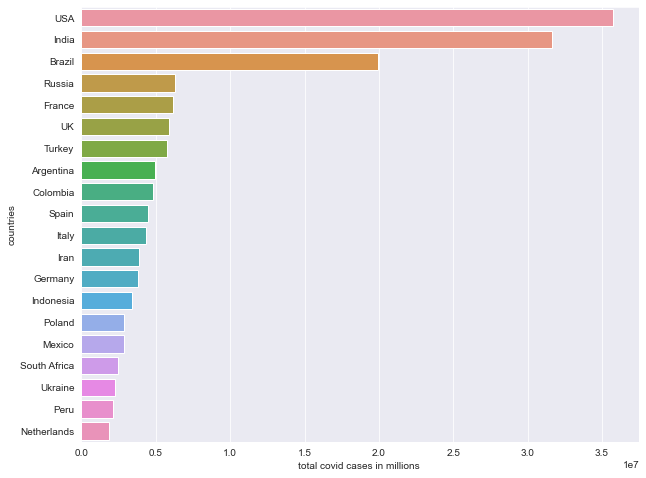

In [18]:
#data['total_confirmed(count)']=data.groupby('country').total_confirmed.tail(1)
x=data.groupby('country')['total_confirmed(count)'].mean().sort_values(ascending=False).head(20)
sns.set_style('darkgrid')
plt.figure(figsize=(10,8))
ax=sns.barplot(x.values,x.index)
ax.set_xlabel("total covid cases in millions ")
ax.set_ylabel("countries")
plt.show()

In [19]:
covid_deaths_top_20 = data[['country','total_deaths_per_1m_population','continent']].dropna().sort_values('total_deaths_per_1m_population')[-20:]
covid_deaths_top_20

,country,total_deaths_per_1m_population,continent
206,UK,1899.0,Europe
155,Poland,1991.0,Europe
50,Croatia,2025.0,Europe
152,Paraguay,2066.0,South America
100,Italy,2121.0,Europe
180,Slovenia,2130.0,Europe
18,Belgium,2168.0,Europe
179,Slovakia,2296.0,Europe
7,Argentina,2316.0,South America
45,Colombia,2346.0,South America


In [20]:
x = list(covid_deaths_top_20['total_deaths_per_1m_population'].reset_index(drop=True))
x

[1899.0,
 1991.0,
 2025.0,
 2066.0,
 2121.0,
 2130.0,
 2168.0,
 2296.0,
 2316.0,
 2346.0,
 2595.0,
 2598.0,
 2637.0,
 2642.0,
 2646.0,
 2791.0,
 2831.0,
 2973.0,
 3117.0,
 5865.0]

In [21]:
y = list(covid_deaths_top_20['country'].reset_index(drop=True))
y

['UK',
 'Poland',
 'Croatia',
 'Paraguay',
 'Italy',
 'Slovenia',
 'Belgium',
 'Slovakia',
 'Argentina',
 'Colombia',
 'Montenegro',
 'Brazil',
 'Macedonia',
 'Bulgaria',
 'San Marino',
 'Gibraltar',
 'Czech Republic',
 'Bosnia And Herzegovina',
 'Hungary',
 'Peru']

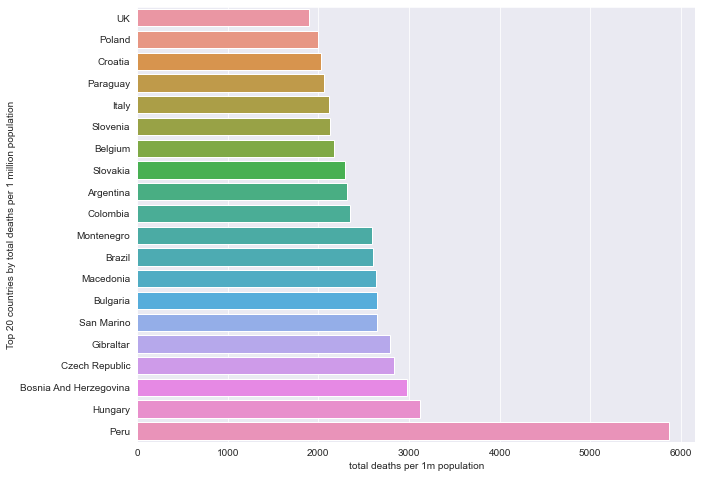

In [22]:
    x = list(covid_deaths_top_20['total_deaths_per_1m_population'].reset_index(drop=True))
    y = list(covid_deaths_top_20['country'].reset_index(drop=True))
    sns.set_style('darkgrid')
    plt.figure(figsize=(10,8))
    ax=sns.barplot(x=x,y=y)
    ax.set_xlabel('total deaths per 1m population')
    ax.set_ylabel('Top 20 countries by total deaths per 1 million population')
    plt.show()



In [23]:
data_daily['active_cases(count)']=data_daily.groupby("country").active_cases.tail(1)
data_daily.groupby('country')['active_cases(count)'].mean().sort_values(ascending=False).head(20)

country
USA             5407404.0
UK              1202712.0
Brazil           729381.0
Spain            654358.0
Indonesia        549343.0
Russia           495447.0
India            415397.0
Iran             412455.0
Mexico           377623.0
France           295105.0
Argentina        256785.0
Turkey           204207.0
Thailand         192526.0
Honduras         186889.0
Malaysia         183706.0
Netherlands      177580.0
Bangladesh       155453.0
South Africa     155397.0
Poland           153919.0
Iraq             142130.0
Name: active_cases(count), dtype: float64

Text(0, 0.5, 'countries')

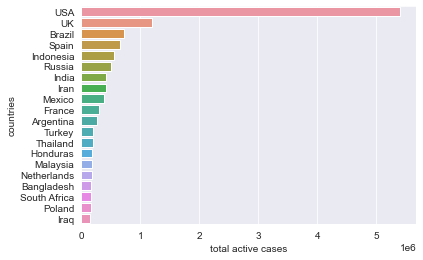

In [24]:
x=data_daily.groupby('country')['active_cases(count)'].mean().sort_values(ascending=False).head(20)
sns.set_style("darkgrid")
plt.Figure(figsize=(20,15))
ax=sns.barplot(x.values,x.index)
ax.set_xlabel("total active cases")
ax.set_ylabel("countries")

In [25]:
data['total_tests(count)']=data.groupby("country").total_tests.tail(1)
data.groupby("country")['total_tests(count)'].mean().sort_values(ascending=False).head(20)

country
USA                     529577328.0
India                   466427038.0
UK                      244114700.0
Russia                  165300000.0
China                   160000000.0
France                  104611244.0
Italy                    77544194.0
Denmark                  76232150.0
Turkey                   67868851.0
Germany                  67083026.0
Austria                  66567305.0
United Arab Emirates     65922553.0
Spain                    55855941.0
Brazil                   55034721.0
Canada                   38466868.0
Czech Republic           32954689.0
Indonesia                26301202.0
Iran                     25857430.0
Saudi Arabia             25029275.0
Australia                25012386.0
Name: total_tests(count), dtype: float64

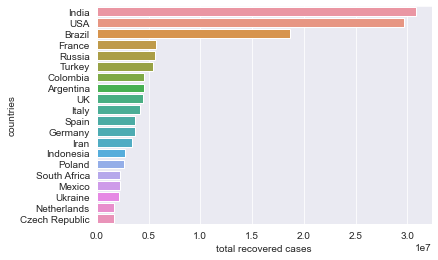

In [26]:
x=data.groupby('country')['total_recovered'].mean().sort_values(ascending=False).head(20)
sns.set_style("darkgrid")
plt.Figure(figsize=(20,15))
ax=sns.barplot(x.values,x.index)
ax.set_xlabel("total recovered cases")
ax.set_ylabel("countries")


plt.show()

In [27]:
data.iloc[:,:].corr().style.background_gradient(cmap='Reds').format("{:.3f}")

,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population,total_confirmed(count),total_tests(count)
total_confirmed,1.000,0.934,0.997,0.773,0.808,0.167,0.222,0.889,0.004,0.547,1.000,0.889
total_deaths,0.934,1.000,0.936,0.753,0.838,0.168,0.359,0.764,-0.017,0.447,0.934,0.764
total_recovered,0.997,0.936,1.000,0.722,0.809,0.163,0.233,0.879,0.001,0.570,0.997,0.879
active_cases,0.773,0.753,0.722,1.000,0.586,0.145,0.185,0.762,0.032,0.224,0.773,0.762
serious_or_critical,0.808,0.838,0.809,0.586,1.000,0.076,0.226,0.625,-0.077,0.444,0.808,0.625
total_cases_per_1m_population,0.167,0.168,0.163,0.145,0.076,1.000,0.683,0.121,0.386,-0.088,0.167,0.121
total_deaths_per_1m_population,0.222,0.359,0.233,0.185,0.226,0.683,1.000,0.133,0.150,-0.050,0.222,0.133
total_tests,0.889,0.764,0.879,0.762,0.625,0.121,0.133,1.000,0.133,0.648,0.889,1.000
total_tests_per_1m_population,0.004,-0.017,0.001,0.032,-0.077,0.386,0.150,0.133,1.000,-0.081,0.004,0.133
population,0.547,0.447,0.570,0.224,0.444,-0.088,-0.050,0.648,-0.081,1.000,0.547,0.648


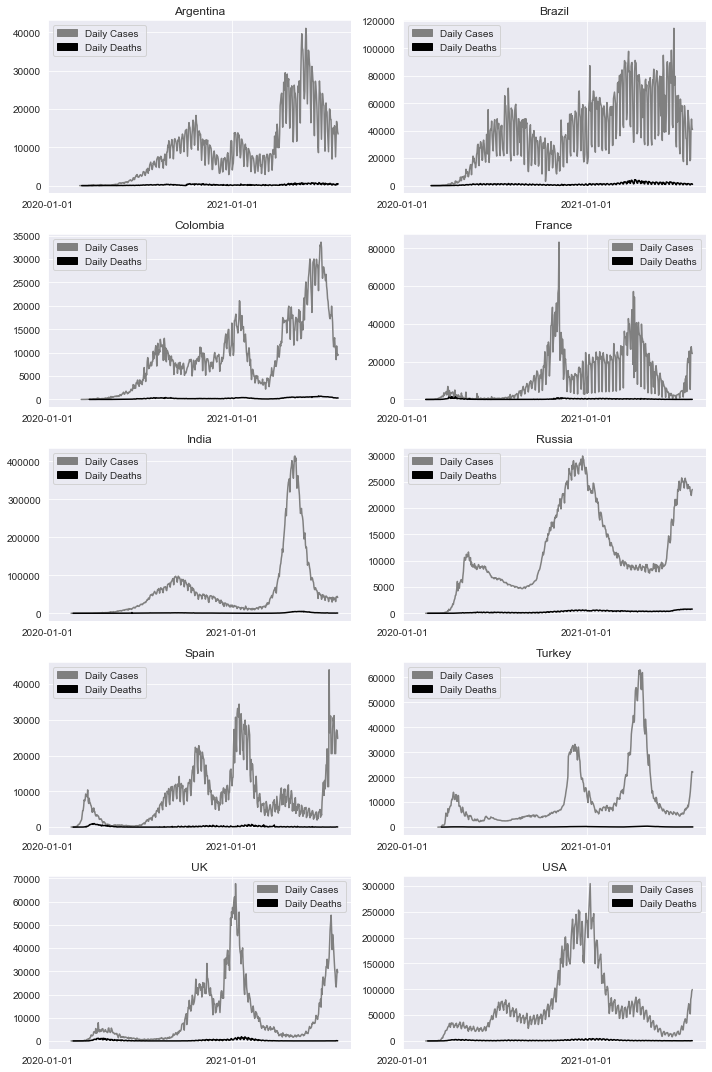

In [28]:
import matplotlib.patches as mpatches
top_countries = data_daily.loc[data_daily['country'].isin(data.sort_values('total_confirmed', ascending= False).reset_index()['country'][:10])]

plt.figure(figsize= (10, 15))

i = 1
for country in top_countries['country'].unique():
    
    datas = top_countries.loc[top_countries['country'] == country]
    
    plt.subplot(5, 2, i)
    sns.lineplot(x = datas['date'],
                y = datas['daily_new_cases'],
                color= 'gray')


    sns.lineplot(x = datas['date'],
                y = datas['daily_new_deaths'],
                color= 'black')
    
    plt.title(str(country))
    plt.xticks(['2020', '2021'])
    plt.ylabel('')
    plt.xlabel('')
    
    i += 1

    cases_patch = mpatches.Patch(color='gray', label='Daily Cases')
    deaths_patch = mpatches.Patch(color='black', label='Daily Deaths')
    plt.legend(handles=[cases_patch, deaths_patch])
    
plt.tight_layout()
plt.show()

In [29]:
data[['continent','total_cases_per_1m_population',]][data['total_cases_per_1m_population'] >=85844].groupby('continent').count()

,total_cases_per_1m_population
continent,
Africa,1
Asia,5
Europe,16
North America,4
South America,5


<AxesSubplot:xlabel='continent', ylabel='total_cases_per_1m_population'>

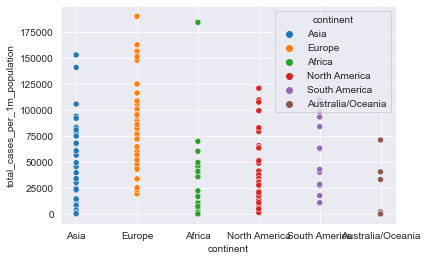

In [30]:
title = ("Confirmed Rates", "The number of confirmed cases per total confirmed cases")
data = data
data['confirmed_rate'] =  data['total_confirmed']*100/data['population']
data = data.dropna(subset=['confirmed_rate'])
fig = sns.scatterplot(data = data, x="continent", y="total_cases_per_1m_population",hue='continent')
fig
